# Introduction
This notebook will allow us to see exactly how good of an estimate the Bateman-Horn Conjecture gives for various values of $k \in \mathbb{N}$.
We want to compare $Q(f; x)$ to $C(f)/2\ \mathrm{Li}(x)$ for large values of $x$.

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sage.all import primes_first_n
from sage.all import legendre_symbol
from sage.sets.primes import *
from sage.functions.exp_integral import log_integral_offset as Li
import numpy as np

plt.style.use('bmh')
plt.style.use('tex')

P = Primes()

In [10]:
def bateman_horn_constant(N, k):
    """
        Computes the Bateman-Horn Constant for f(x) = x^2+x+k.
        
        k : an (odd) integer. Determines the polynomial we will be finding the constant for
        N : the number of primes to go out to in the product.
    
    """
    
    # Prepare the first N primes!
    primes_list = primes_first_n(N)
    primes_list.pop(0)
    
    # Compute 1-4k
    C = 1 - 4 * k
    
    # Start with the value for p = 2
    product = 2.0
    
    # Compute the rest of the product
    for p in primes_list:
        product *= (p - 1 - legendre_symbol(C, p)) / (p - 1)
        
    return product

In [11]:
### Return an array with the tally of Q(f; x)
def bateman_horn_Q_f(N, k):
    # Make an empty array
    array = np.zeros(N)
    
    for i in range(N):
        if (i**2 + i + k) in P:
            array[i] = array[i-1] + 1
        else:
            array[i] = array[i-1]
        
    return array

In [12]:
def bateman_horn_Li(N, k):
    
    # Calculate the constant
    C_f = bateman_horn_constant(N, k)
    
    return C_f * .5 * np.array([float(Li(x)) for x in range(N)])
    

In [13]:
def plot_bateman_horn(N, k):
    fig, ax = plt.subplots()
    
    ax.plot(bateman_horn_Q_f(N+10, k))
    ax.plot(bateman_horn_Li(N+10, k))

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

    ax.set_xlim(0, N)
    ax.set_ylim(0)

    ax.legend(("$Q(f; x)$", "$C(f) /2 \ \mathrm{Li}(x)$"), loc='upper left', fontsize='large')

    plt.show()

<IPython.core.display.Javascript object>


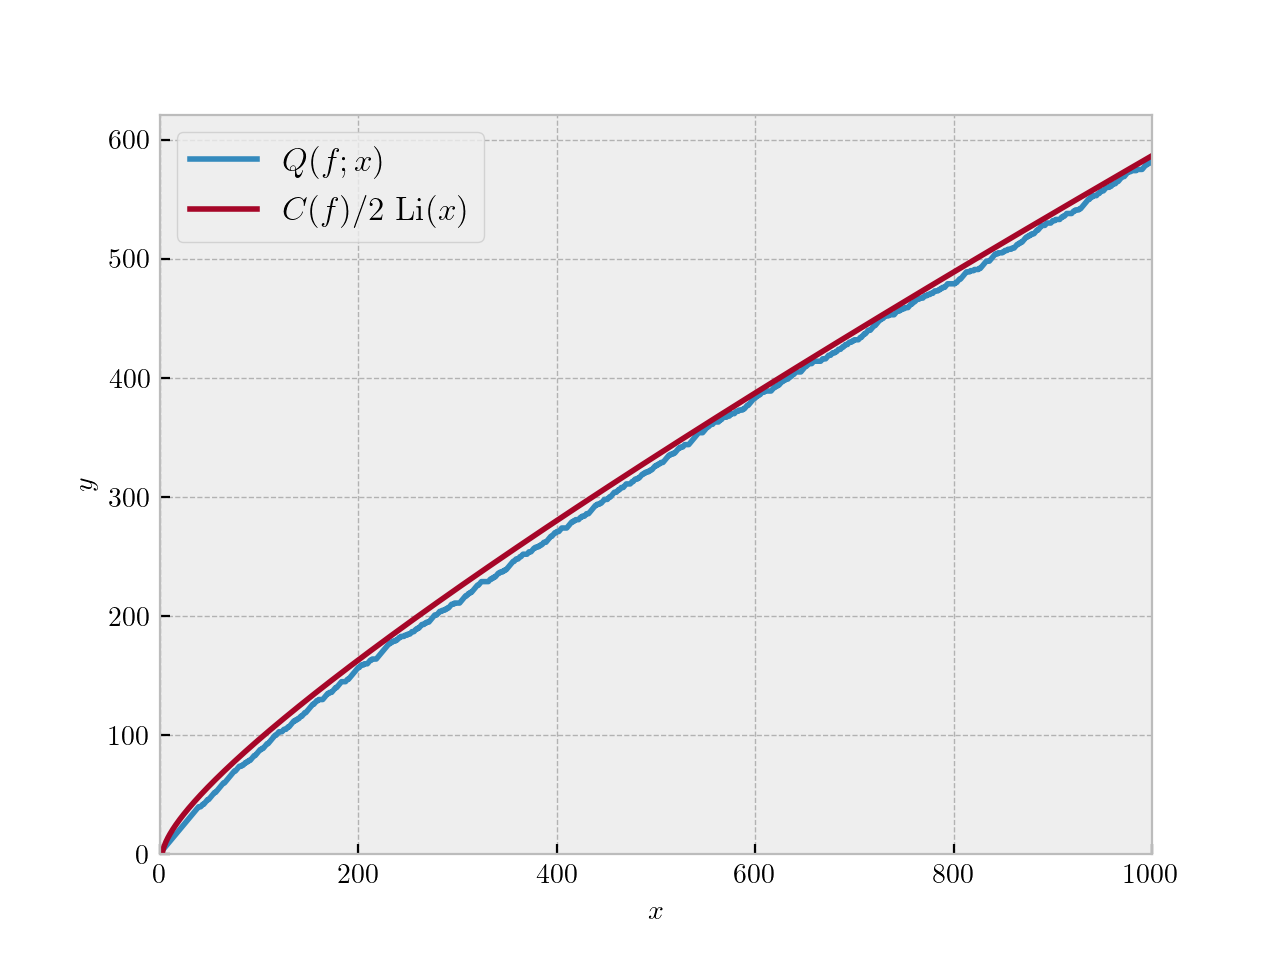

In [14]:
plot_bateman_horn(1000, 41)
plt.savefig('../graphics/Q_f_vs_Li.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


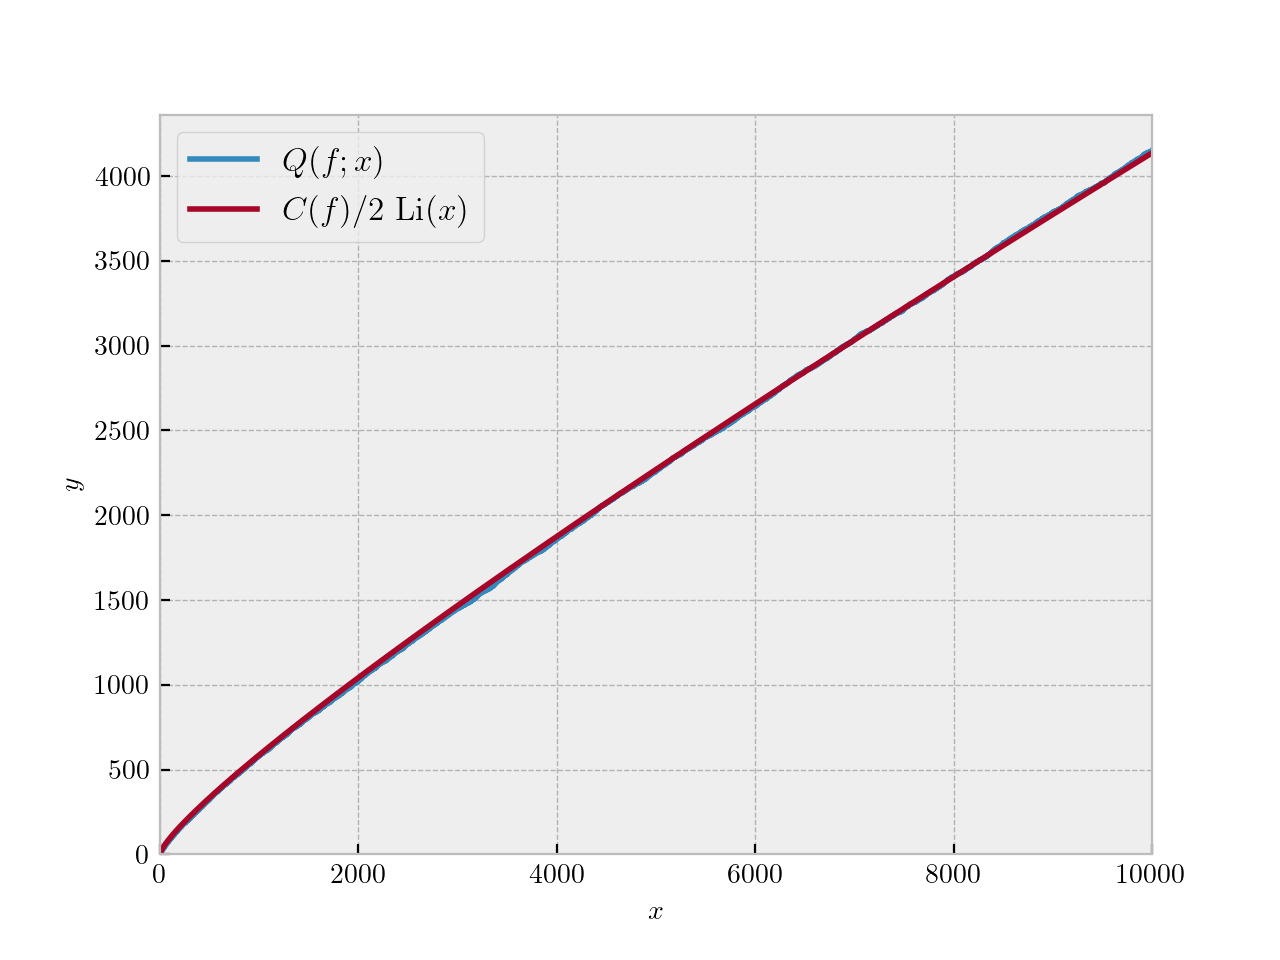

In [17]:
plot_bateman_horn(10000, 41)
plt.savefig('../graphics/Q_f_vs_Li_more.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


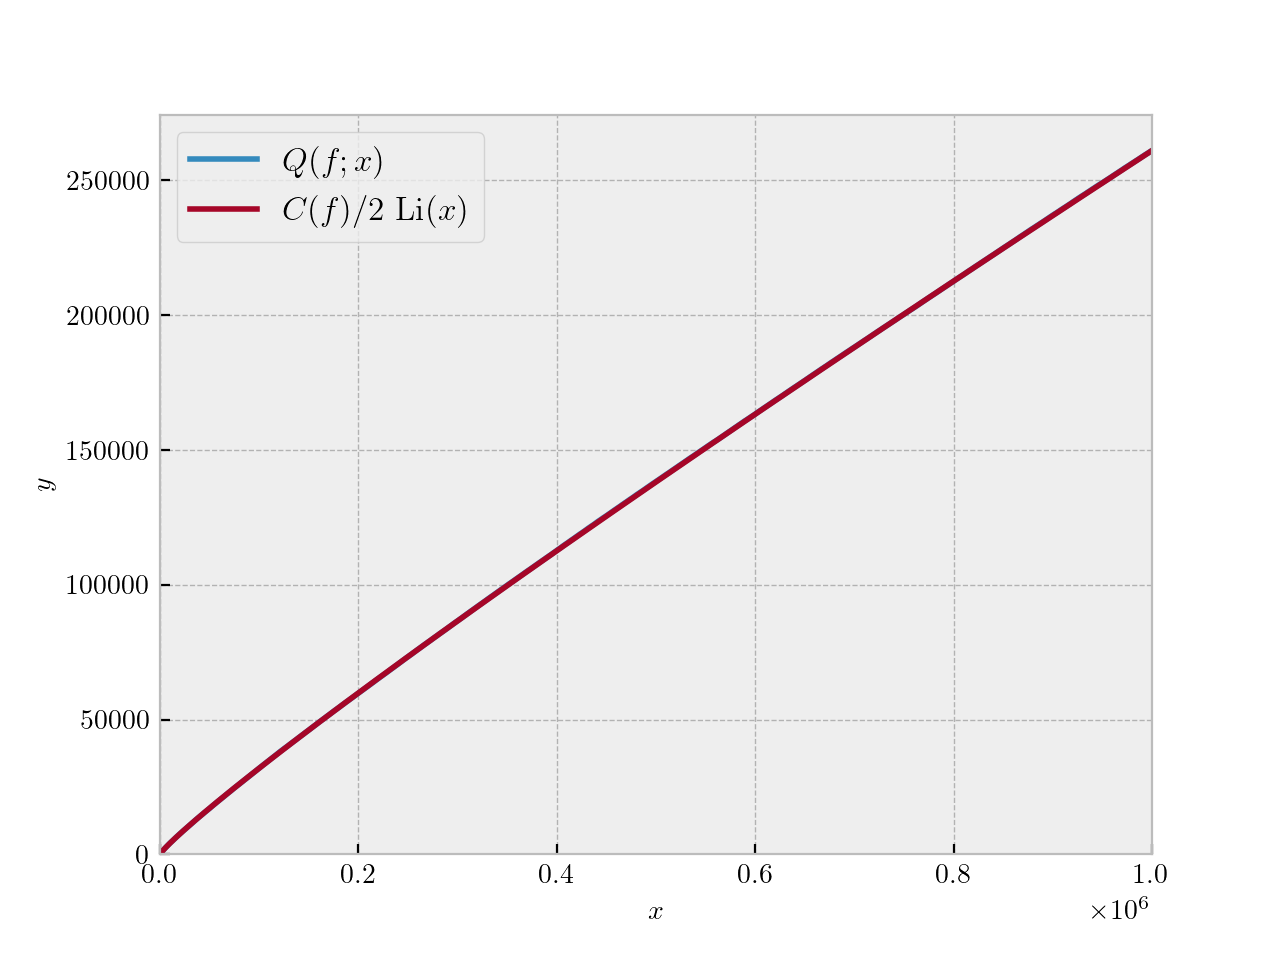

In [18]:
plot_bateman_horn(10**6, 41)

In [19]:
plt.savefig('../graphics/Q_f_vs_Li_even_more.pdf', bbox_inches="tight")